In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#hiển thị biểu đồ ngay sau các ô mã trong Notebook 
%matplotlib inline 
import seaborn as sns

In [3]:
df = pd.read_csv('abalone.csv')
df.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole_weight    4177 non-null   float64
 5   Shucked_weight  4177 non-null   float64
 6   Viscera_weight  4177 non-null   float64
 7   Shell_weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [7]:
df['Age'] = df['Rings']+1.5
df = df.drop('Rings', axis = 1)

# Tách các cột có kiểu số và kiểu phân loại
numerical_features = df.select_dtypes(include=[np.number]).columns
categorical_features = df.select_dtypes(include=[object]).columns

print("Numerical features:\n" + "\n".join(numerical_features))
print("Categorical features:", categorical_features)

Numerical features:
Length
Diameter
Height
Whole_weight
Shucked_weight
Viscera_weight
Shell_weight
Age
Categorical features: Index(['Sex'], dtype='object')


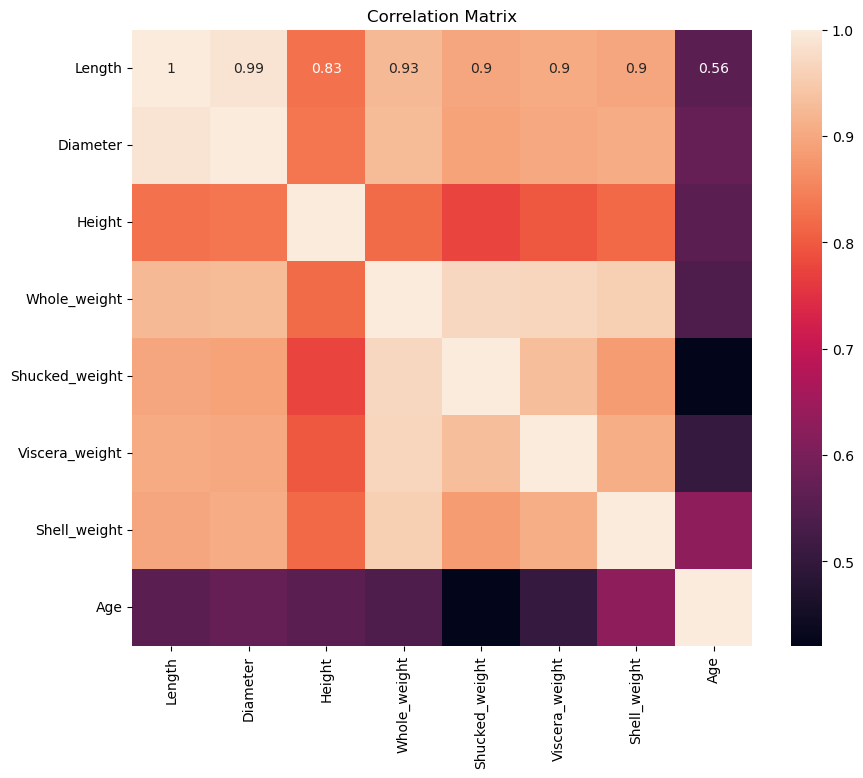

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_features].corr(), annot=True)
plt.title('Correlation Matrix')
plt.show()

E:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
E:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
E:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
E:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_

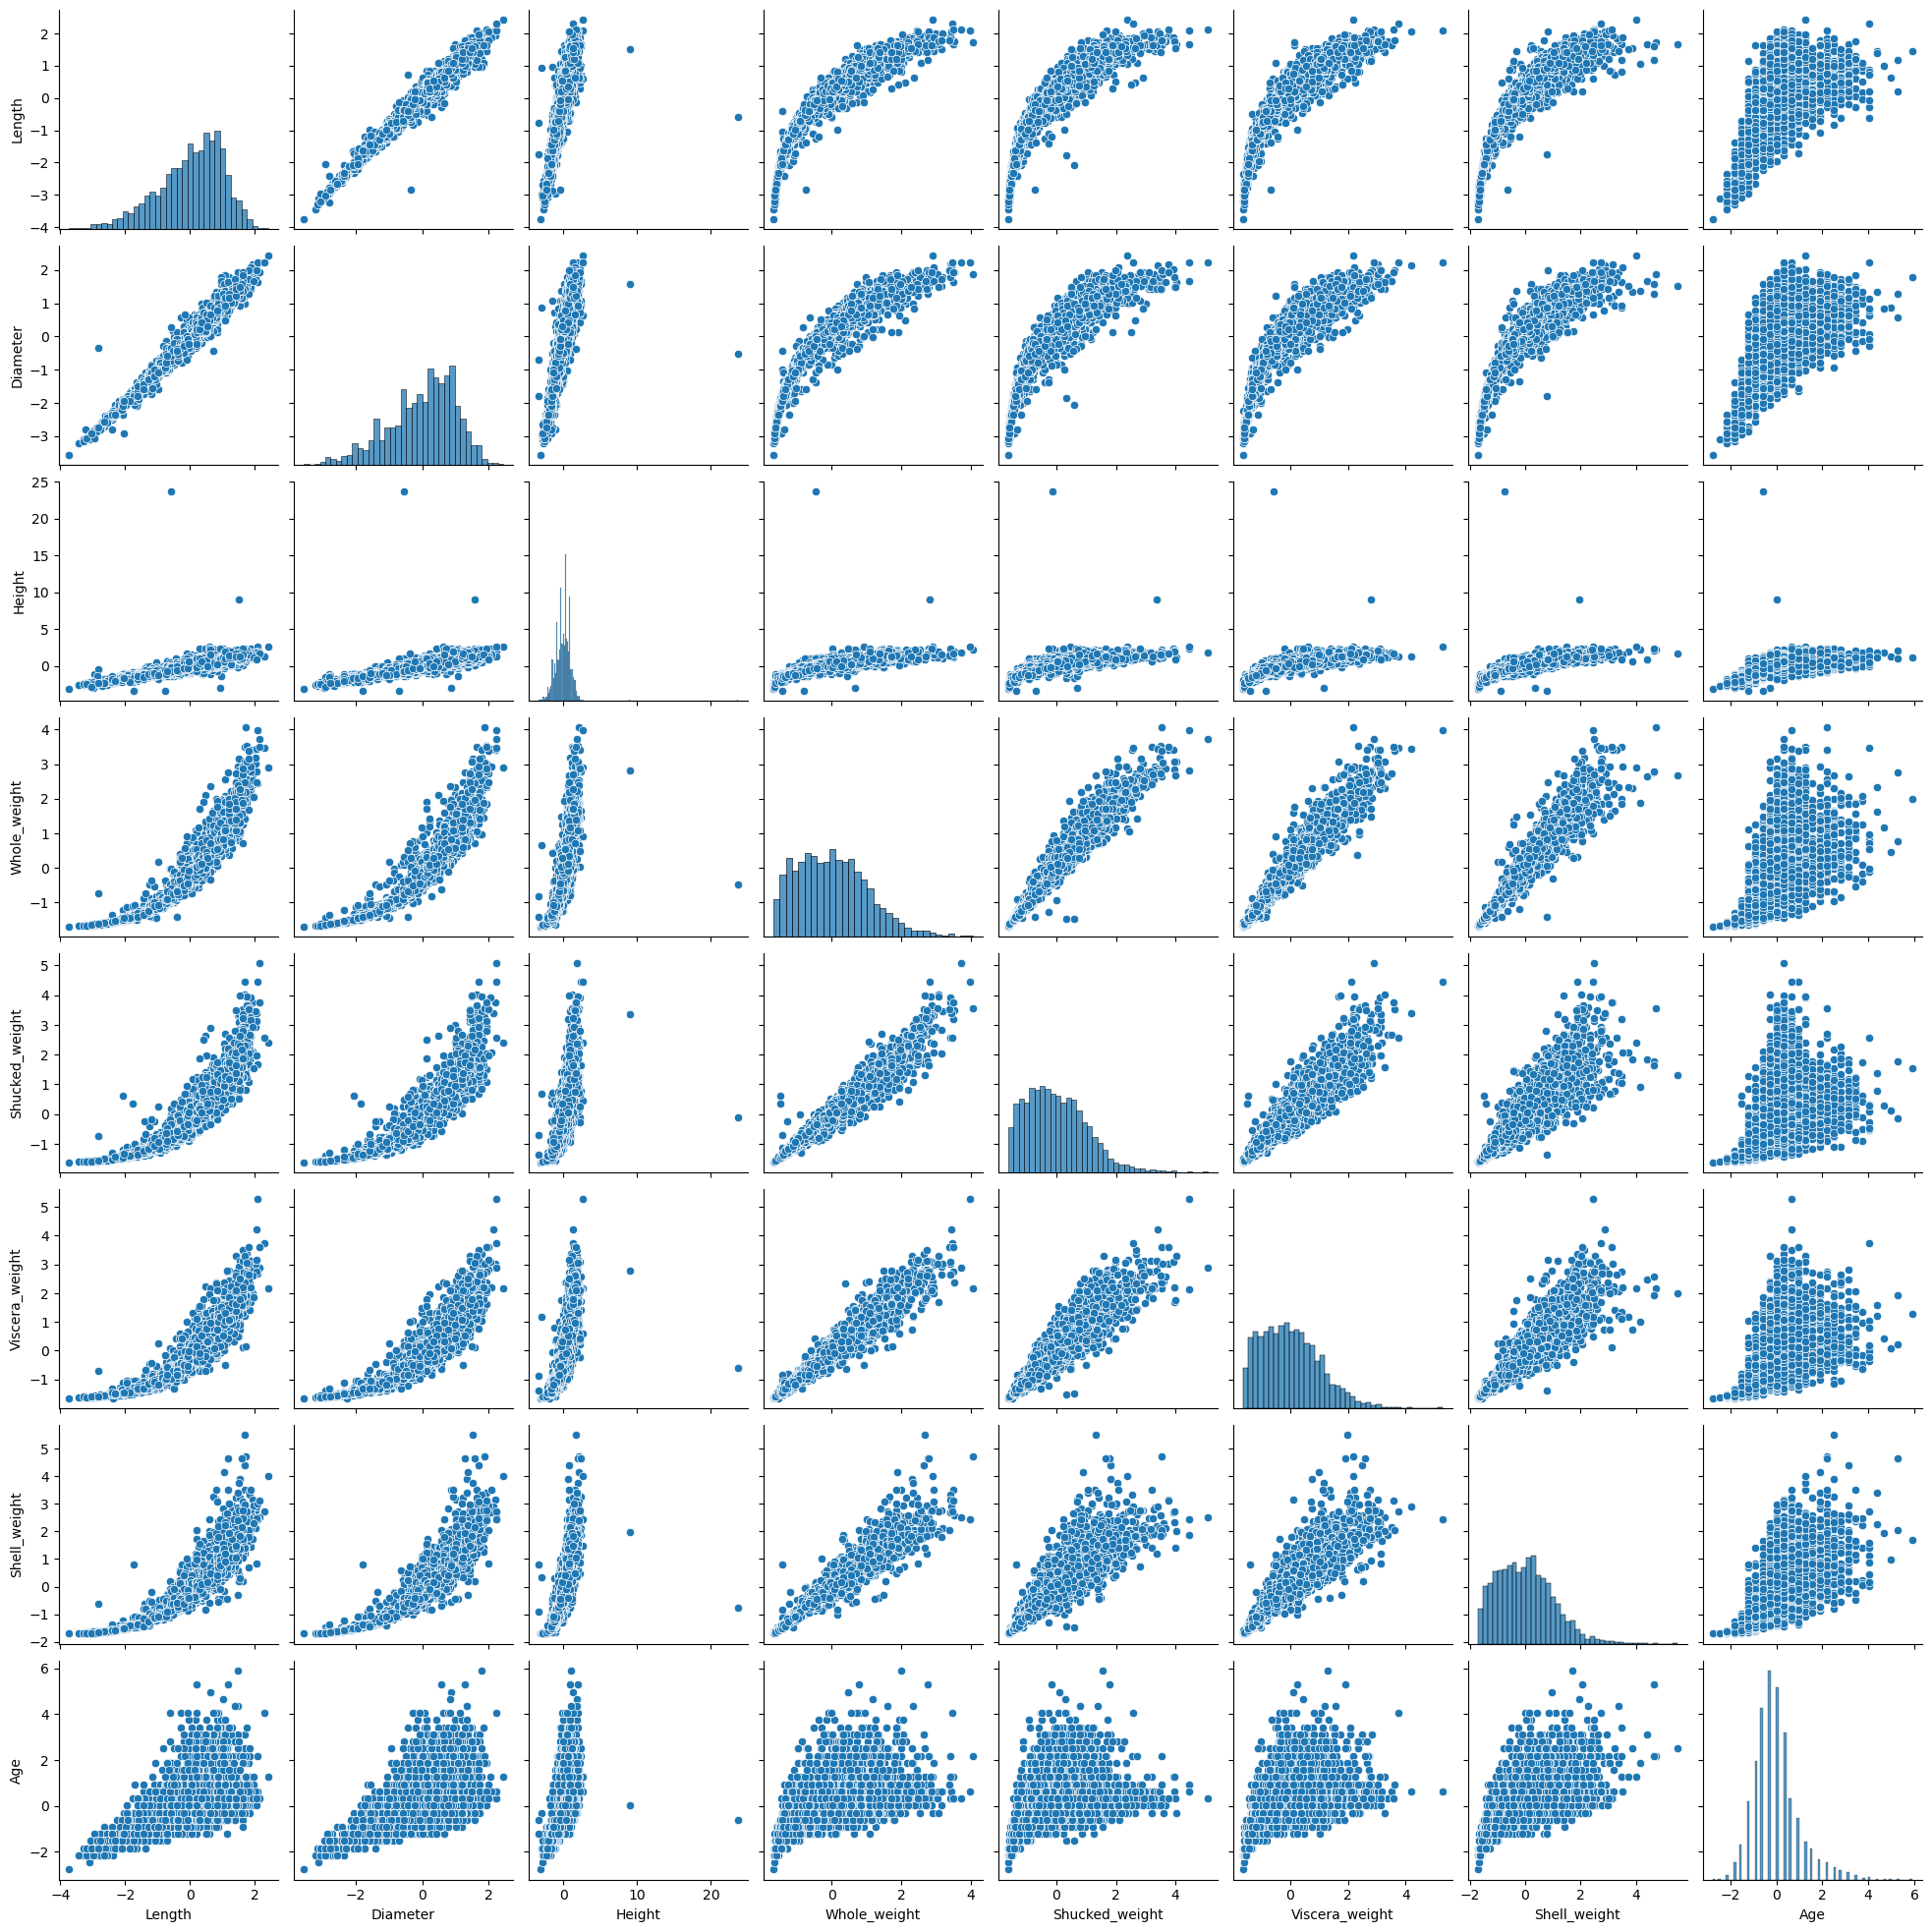

In [21]:
sns.pairplot(df)
plt.show()

In [8]:
from sklearn.preprocessing import StandardScaler

X = df[numerical_features].drop('Age', axis = 1)
y = df['Age']

# Chuẩn hóa Standardization
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Kết quả sau khi chuẩn hóa
print(df.head()) 

  Sex    Length  Diameter    Height  Whole_weight  Shucked_weight  \
0   M -0.574558 -0.432149 -1.064424     -0.641898       -0.607685   
1   M -1.448986 -1.439929 -1.183978     -1.230277       -1.170910   
2   F  0.050033  0.122130 -0.107991     -0.309469       -0.463500   
3   M -0.699476 -0.432149 -0.347099     -0.637819       -0.648238   
4   I -1.615544 -1.540707 -1.423087     -1.272086       -1.215968   

   Viscera_weight  Shell_weight       Age  
0       -0.726212     -0.638217  1.571544  
1       -1.205221     -1.212987 -0.910013  
2       -0.356690     -0.207139 -0.289624  
3       -0.607600     -0.602294  0.020571  
4       -1.287337     -1.320757 -0.910013  


In [9]:
from sklearn.model_selection import train_test_split

# Chia dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# In ra số lượng mẫu trong từng tập
print("Số lượng mẫu trong tập huấn luyện:", X_train.shape[0])
print("Số lượng mẫu trong tập kiểm tra:", X_test.shape[0])


Số lượng mẫu trong tập huấn luyện: 3132
Số lượng mẫu trong tập kiểm tra: 1045


## Linear Regression

In [10]:
from sklearn.linear_model import LinearRegression

model_LR = LinearRegression()
model_LR.fit(X_train, y_train)

y_train_pred = model_LR.predict(X_train)
y_test_pred = model_LR.predict(X_test)

In [27]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('Linear Regression')

# Train
r2_train = r2_score(y_train, y_train_pred)
print('R2 Score of training set:%.2f'% r2_train)

mse_train = mean_squared_error(y_train, y_train_pred)
print('Mean Squared error of training set :%2f'% mse_train)

# Test
r2_test = r2_score(y_test, y_test_pred)
print('R2 Score of testing set:%.2f'% r2_test)

mse_test = mean_squared_error(y_test, y_test_pred)
print('Mean Squared error of testing set :%2f'% mse_test)

Linear Regression
R2 Score of training set:0.46
Mean Squared error of training set :5.638989
R2 Score of testing set:0.68
Mean Squared error of testing set :3.256818


## Support vector Regression

In [25]:
from sklearn.svm import SVR

model_SVR = SVR(kernel = 'linear')
model_SVR.fit(X_train, y_train)
model_SVR.fit(X_test, y_test)

y_train_pred = model_SVR.predict(X_train)
y_test_pred = model_SVR.predict(X_test)

print('SVR Score of training set:%.2f'%model_SVR.score(X_train, y_train))

print('SVR Score of testing set:%.2f'%model_SVR.score(X_test, y_test))

SVR Score of training set:0.41
SVR Score of testing set:0.45


## KNeighborsRegressor

In [26]:
from sklearn.neighbors import KNeighborsRegressor

model_KNN = KNeighborsRegressor(n_neighbors =4 )
model_KNN.fit(X_train, y_train)
model_KNN.fit(X_test, y_test)

y_train_pred = model_KNN.predict(X_train)
y_test_pred = model_KNN.predict(X_test)


print('KNN Score of training set:%.2f'%model_KNN.score(X_train, y_train))

print('KNN Score of testing set:%.2f'%model_KNN.score(X_test, y_test))

KNN Score of training set:0.46
KNN Score of testing set:0.68
